# Fourier Transform (& wavelets)

Most scientific break throughs have occured by approaching problem from a different coordinate system. Fourier transform is a coordinate transform into harmonic (sin & cos) system. Fourier transform says any function can be approximated by an infinite number of sin and cosines of increasing frequency.

Fast Fourier Transform - how you efficiently compute a Fourier series on a computer. Modern digital communication is built on the Fast Fourier Transform.

In series, going to look at Fourier transforms for: 
- Function approximation
- Image compression
- Audio compression
- Denoising

For reference, knowing that a projection is the following integral $<f(x), g(x)> = \int f(x) \bar{g}(x) dx$ the Fourier series is defined as a projection onto an basis of infinite number sin and consines of $2 \pi $ frequency. 


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

## Fourier series (video 2) 
https://www.youtube.com/watch?v=MB6XGQWLV04&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=2 <br>
Approximating a function, f(x) as $ f(x) = \frac{A_0}{2} + \sum^\infty_{k=1} (A_k cos(kx) + B_k sin(kx))$. Coefficients $A_0$, $A_k$ and $B_k$ need to be computed. Further, inputs into sin and cos are *2 $\pi$ periodic*.

$A_0 = <f,1(.)> * dx$ the projection onto a vector of ones.

The coefficients $A_k$ and $B_k$ are computed by the Hilbter space inner product of function f(x) with specific cosine or sin frequency. 
$$
\begin{align}
A_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) cos(kx)dx \\
B_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) sin(kx)dx \\
\end{align}
$$
Where the above can be rewritten as a projection of inner products: 
$$
\begin{align}
A_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) cos(kx)dx = \frac{1}{||cos(kx)||^2} <f(x), cos(kx)>\\
B_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) sin(kx)dx = \frac{1}{||sin(kx)||^2} <f(x), sin(kx)> \\
\end{align}
$$

Fourier series is just a representation of writing a function in orthogonal basis of sin's and cosine's.

<font color='red'>Show relation from function representation of Fourier series to projection onto basis to least squares coefficients.</font> 

## Fouerier series (video 3)
https://www.youtube.com/watch?v=Ud9Xtxsi2HI&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=3 <br>
An extension is made to the previous form of the projection where coefficients are calculated on $2\pi$ periodicity. Thus: 
$$
\begin{align} 
f(x) &= \frac{A_0}{2} + \sum^{\infty}_{k=1} (A_k cos(\frac{2\pi k x}{l}) + B_k sin(\frac{2\pi k x}{l})) \\
A_k &= \frac{2}{L}\int_{0}^L f(x)cos(\frac{2\pi k x}{l}) dx \\
B_k &= \frac{2}{L}\int_{0}^L f(x)sin(\frac{2\pi k x}{l}) dx \\
\end{align}
$$

## Inner products in Hilbert Space (video 4)
https://www.youtube.com/watch?v=g-eNeXlZKAQ&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=4 <br>
Making equivalance from inner products of vectors and functions. Start with two functions, *f(x)* and *g(x)*, then the following projection holds $<f(x), g(x)> \Delta x = \int_a^b f(x) \bar{g}(x)dx$, where $\Delta x$ is a normalising constant. Similar to the inner product/cosine similarity metric then larger this projection the more similar the functions are. To show how this is similarity metric start by taking a vector of discrete, equidistant points such that each point on x is defined as $x_1, x_2, ... x_n$ where $\Delta x= \frac{x_n - x_1}{n-1}$. 

The discrete dot product between f(x) and g(x) would then become:
$$
f = \begin{bmatrix} f(x_1) \\ f(x_2) \\ \dots \\ f(x_n) \end{bmatrix}
g = \begin{bmatrix} g(x_1) \\ g(x_2) \\ \dots \\ g(x_n) \end{bmatrix}
$$

To inner product/projection then becomes $<f(x), g(x)> = g^tf = \sum^n_{k=1} f(x_k)\bar{g}(x)$. However, note this isn't normalised for the number of data points in discretisation process, the following manipulation is made $<f(x), g(x)> \Delta x = \sum^n_{k=1} f(x_k)\bar{g}(x) \Delta x$ WHICH IS THE APPROXIMATION TO THE REIMANN INTEGRAL AS $\lim{\Delta x\rightarrow \infty}$.

## Complex Fourier Series
https://www.youtube.com/watch?v=4cfctnaHyFM&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=5 <br>
Reiterating the a complex conjugate projection is $<f(x), g(x)> = \int_a^b f(x) \bar{g}(x)dx$ then we use this to extend the Fourier series to the complex realm. In the complex domain, using Euler's formula $e^{ikx} = cos(kx) + isin(kx)$ which yields the following sum $f(x) = \sum ^\infty_{k=1} c_k e^{ikx} = \sum ^\infty_{k=1} (a_k + ib_k)(cos(kx) + isin(kx))$. These functions *for integer vectors, k*, are orthogonal. To show this define $e^{ikx} = cos(kx) + isin(kx) = \psi_k$ then for the projection $<\psi_j, \psi_k>$ = 0 unless k = j. This is because $<\psi_j, \psi_k> = \int^\pi_{-\pi}e^{ijx}e^{-ikx} = \int^\pi_{-\pi}e^{ix (j - k)} = \frac{1}{i(j-k)} e^{ix (j - k)} |^\pi_{-\pi}$ which yields: 
$$
= \begin{cases}
0 & if j \ne k \\
2\pi & if j = k \\
\end{cases} 
$$

Showing the projection is zero unless the projections are j = k shows that each function is an orthogonal projection.

Note: the conversion of $<\psi_j, \psi_k> = \int^\pi_{-\pi}e^{ijx}e^{-ikx}$ due to the complex conjugate required for complex projections.

Further it can then be shown that f(x) can be approximated as $f(x) = \frac{1}{2\pi}\sum^\infty_{k=1} <f(x), \psi_k> \psi_k$ where $<f(x), \psi_k>$ is the projection onto the Fourier series and $\psi_k$ is the basis vector $\psi_k = e^{ikx}$. The projection $<f(x), \psi_k>$ = $\frac{1}{2L} \int^L_{-L}f(x)e^{\frac{-ikx}{L}} dx$

/var/folders/y8/n0cwg6hn0xv21zz309nl1hv40000gn/T/ipykernel_79056/2931126545.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x,f, '-', color = 'k', LineWidth = 2)


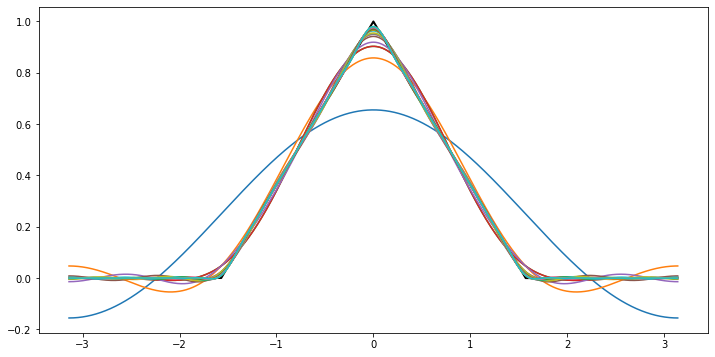

In [25]:
# Fourier series from discrete dot product 
plt.rcParams['figure.figsize'] = [12,6]

#set parameters for hat function 
L = np.pi
dx = 0.0001
x = L * np.arange(-1 + dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))


#create hat function
f = np.zeros_like(x)
f[nquart:nquart*2] =  (4/n)* np.arange(1,nquart+1)
f[nquart*2:nquart*3] =  np.ones(nquart) - (4/n)* np.arange(0,nquart)

#plot hat function
fig, ax = plt.subplots()
ax.plot(x,f, '-', color = 'k', LineWidth = 2)

# set colors 
name = 'Accent'
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color = colors)

#compute Fourier series
num_basis = 20

# compute coefficient for each basis function
A_0 = np.sum(f * np.ones_like(x)) * dx
fFS = A_0/2

# use the dot product to get coefficients
A_k = np.zeros(num_basis)
B_k = np.zeros(num_basis)
for k in range(num_basis):
    A_k[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx
    B_k[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    
    # Use the coefficients to scale each of the basis functions
    fFS = fFS + A_k[k]*np.cos((np.pi * (k+1) * x)/L) + B_k[k]*np.sin((np.pi * (k+1) * x)/L)
    ax.plot(x,fFS, '-')

## The Fourier Transform
https://www.youtube.com/watch?v=jVYs-GTqm5U&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=10 <br>
Focuses on extending from the periodic domain of the **Fourier series** to the entire continuous domain $-\infty$ to $\infty$ of the **Fourier transform**. A Fourier transform can be thought of as a Fourier series where outside the periodic funciton the Fourier transform converges to zero (does not repeat). 


Starting with 
$$ w_k = \frac{k\pi}{L} = k \Delta w$$ 
where
$$ \Delta w = \frac{\pi}{L}$$
and remembering that
$$f(x) = \sum^\infty_{k=1} c_ke^{\frac{ikx}{L}} = \sum^\infty_{k=1} \frac{1}{2L} \int^L_{-L}f(x)e^{\frac{-ik\pi x}{L}} dx e^{\frac{ik\pi x}{L}} $$

Then $lim_{\Delta L \rightarrow \infty} \Delta w \rightarrow 0$ yields the following for f(x): 


$$
\begin{align}
f(x)&= lim_{\Delta L \rightarrow \infty} \sum^\infty_{k=- \infty} \frac{\Delta w}{2\pi} \int^L_{-L}f(x)e^{\frac{-ik\pi x}{L}} dx e^{\frac{ik\pi x}{L}} \\
&= lim_{\Delta L \rightarrow \infty} \sum^\infty_{k=- \infty} \frac{\Delta w}{2\pi} \int^L_{-L}f(x)e^{-i \Delta wx} dx e^{i \Delta wx}\\
&= lim_{\Delta L \rightarrow \infty} \sum^\infty_{k=- \infty} \frac{\Delta w}{2\pi} \int^{\frac{\pi}{\Delta w}}_{-\frac{\pi}{\Delta w}}f(x)e^{-i \Delta wx} dx e^{i \Delta wx}\\
&= \color{red}{\int^\infty_{-\infty} \frac{\Delta w}{2\pi}} \color{blue}{ \int^\infty_{-\infty}f(x)e^{-i \Delta wx} dx e^{i \Delta wx}} \color{red}{dw}\\
\end{align} \\
$$ 

where the Fourier transform is: 
$$ \color{blue}{\int^\infty_{-\infty}f(x)e^{i \Delta wx} dx e^{-i \Delta wx}}$$ 

and the **inverse Fourier transform** is: 
$$ \color{red}{\int^\infty_{-\infty} \frac{\Delta w}{2\pi}} \color{blue}{\dots} \color{red}{e^{i \Delta wx}}$$
dw
Fourier transforms have propperties which are beneficial when solving differential equations, then can be transformed back with inverse Fourier transform.